<a href="https://colab.research.google.com/github/veronica1013/Datascience_core_module2_week2_IP/blob/main/Moringa_Data_Science_Core_Module2_W2_Independent_Project_2021_10_Veronica_Isiaho_Python_Notebook_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Factors Affecting Housing Pricing

## 1. Defining the Question

### a) Specifying the Question

As a Data Scientist, working for Hass Consulting Company, a real estate leader with over 25 years of experience, my main aim is to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### b) Defining the Metric for Success
A model that will accurately predict the sale of house prices 

#### Significance level
The significance level is set at alpha = 0.05

### c) Understanding the context 


Details of the columns is as listed below:
1. Id 
2. price  - Price of the house
3. bedrooms - Number of Bedrooms
4. bathrooms - Number of Bathrooms
5. sqft_living - Square feet area of living area
6. sqft_lot  - Square feet area of parking Layout
7. floors - Number of Floors
8. waterfront - Whether waterfront is there or not
9. view - Number of Views
10. grade - Grades
11. sqft_above
12. sqft_basement - Square feet area off basement
13. yr_built - Year the house is built
14. yr_renovated - Year the house is renovated
15. zipcode - zipcode os the house
16. lat : Latitude of the house
17. lon : Longitude of the house
18. sqft_living15
19. sqft_lot15

### d) Recording the Experimental Design
The experimental design will be as listed below:
1. Loading the data
2. Understanding the data
3. Data Cleaning
4. Perform univariate, bivariate and multivariate analysis
5. Perform regression analysis (Incorporate categorical independent variables into the models)
*   Multiple Linear Regression
*   Quantile Regression
*   Ridge Regression
*   Lasso Regression
*   Elastic Net Regression
6. Check for Multicollinearity
7. Provide a recommendation based on the analysis
8. Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
9. Challenge the solution by providing insights on how to make improvements in model 

### e) Data Relevance

The data that was used for prediction was obtained from the information on real estate properties that was collected over the past few months.

### 1.1 Importing the libraries

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

## 2. Loading the Data

The dataset and glossary to use for this project can be found here [link](http://bit.ly/IndependentProjectWeek7Dataset).

In [3]:
# Loading the data 
url = "http://bit.ly/IndependentProjectWeek7Dataset"
data= pd.read_csv(url)


## 3. Checking the Data

In [4]:
# Preview first rows
data.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [5]:
# Preview last rows
data.tail(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
# Check the shape
data.shape

(21613, 20)

In [7]:
# Ckeck column names
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
# Check the data types
data.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
# Check if there are any missing values
data.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
# Check duplicates if any in the dataset
data.duplicated().sum()

3

In [11]:
# Confirm the 3 duplicates
duplicate = data[data.duplicated()]
duplicate

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14983,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20054,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


Itis evident that the data is not similar. Thus decided to keep them.

In [12]:
# Check for duplicates using the id column
data['id'].duplicated().sum()

177

In [13]:
# Check the index of the duplicates
duplicate_id = data['id'][data['id'].duplicated()]
duplicate_id

94       6021501535
314      4139480200
325      7520000520
346      3969300030
372      2231500030
            ...    
20181    7853400250
20613    2724049222
20670    8564860270
20780    6300000226
21581    7853420110
Name: id, Length: 177, dtype: int64

In [14]:
# Check for duplicates by column id
duplicated_id = data[data['id'].duplicated()]
duplicated_id

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
314,4139480200,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
325,7520000520,240500.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
346,3969300030,239900.0,4,1.00,1000,7134,1.0,0,0,3,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
372,2231500030,530000.0,4,2.25,2180,10754,1.0,0,0,5,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,7853400250,645000.0,4,3.50,2910,5260,2.0,0,0,3,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260
20613,2724049222,220000.0,2,2.50,1000,1092,2.0,0,0,3,7,990,10,2004,0,98118,47.5419,-122.271,1330,1466
20670,8564860270,502000.0,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20780,6300000226,380000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598


In [15]:
# Check for duplicates by id and price column
for i in data['id']:
  if i == 6021501535:
    print(i)
  

df_duplicates = data[data.duplicated(subset=['id', 'price'], keep=False)]
df_duplicates

6021501535
6021501535


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3950,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
3951,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14982,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
14983,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20053,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078
20054,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


Checking for duplicates by price and id column returns six data points. I will check for exact details of the 177 duplicates by using keep=False for ease of comparison

In [16]:
# Confirm details of the duplicates
df1_duplicates = data[data.duplicated(subset=['id'], keep=False)]
df1_duplicates

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,430000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,1380000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,232000.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,502000.0,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,240000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,380000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,594866.0,3,3.00,2780,6000,2.0,0,0,3,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


It's evident that the data points with the duplicate values are of the same house gauginh from the location, sizes, year buit etc but the difference is in their prices. With the price variations, it is difficult to make a decision on which price to keep  so I will drop all the duplicate houses with different prices during data cleaning.

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation
Performed a validation with the Hass Consult [Website](https://hassconsult.co.ke/real-estate/hass-index/14-the-hass-sales-index?typ=2&layout=3). More information is found on this [link](https://hassconsult.co.ke/real-estate/images/HassPropertyIndexQ12021.pdf).

## 5. Data Cleaning

### 5.1 Cleaning the Dataset

In [17]:
# Considering that we will use rank, country full and rank date columns, we will drop the rest 
# as they wont be used.
# The Rank column from the Rankings dataset will be used to merge onto the results dataset
#column_names = ['country_abrv', 'total_points',
       #'previous_points', 'rank_change', 'cur_year_avg',
       #'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       #'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       #'three_year_ago_weighted', 'confederation']

#ranking_df = ranking_data.drop(columns=column_names)
#ranking_df.head(2)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [19]:
for f in data["yr_renovated"]:
  if f > 0:
    print(f)

#data["yr_renovated"]

1991
2002
1991
2010
1999
1992
2013
1994
1991
1978
2005
2008
2003
1994
1984
1984
2002
1954
2014
2011
1974
2014
1999
1983
2013
2003
2005
2003
2013
1945
1990
1990
1988
2005
1957
1977
1981
2014
1995
2002
1978
2000
1999
1977
1998
1995
1970
1984
1989
1990
2004
2011
1994
1986
1992
2014
1994
2009
2004
2007
2014
1990
1990
2007
1987
1973
2006
1985
1995
2004
2001
2000
1986
1980
2014
1992
1971
2003
1994
1945
2007
1979
1997
2014
2014
2010
2013
2011
2003
2002
2000
2014
1950
1988
2000
1990
1969
2014
2014
2006
2006
2014
1948
2009
2006
1991
1983
2014
1970
2015
2014
1978
2010
2013
1989
1974
2008
2005
2001
2014
1968
2014
2004
2003
1986
1989
2012
2013
2014
2010
2006
2014
2007
2007
2014
2002
1987
2008
2007
2001
2011
1991
2013
1991
1968
2014
2005
2003
1995
2015
2004
2014
2006
1986
1963
1989
2002
2013
2013
1997
1984
2011
1987
2013
2014
2014
1951
1993
1989
2003
1962
2005
1999
2008
1992
2013
1977
1996
1981
2014
1972
1990
1999
2014
1970
2001
1985
2014
2006
2004
1980
1980
2005
1953
1993
2013
1998
2006
1983
1996


In [20]:
# Change the data type for year built and year renovated column from int64 to datetime
data["yr_built"] = pd.to_datetime(data["yr_built"], format='%Y')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  datetime64[ns]
 14  yr_renovated   21613 non-null  int64         
 15  zipcode        2161

In [21]:
# Can't change the year renovated data type to datetime because of the zero value as years
# Change the datatype to string first
data["yr_renovated"] = data["yr_renovated"].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  datetime64[ns]
 14  yr_renovated   21613 non-null  object        
 15  zipcode        2161

In [22]:
# Change the string to four zeros
data['yr_renovated']=['000'+x if x=='0' else x for x in data['yr_renovated'] ]
data['yr_renovated']

0        0000
1        1991
2        0000
3        0000
4        0000
         ... 
21608    0000
21609    0000
21610    0000
21611    0000
21612    0000
Name: yr_renovated, Length: 21613, dtype: object

In [23]:
# check the number of houses with no year of renovation
# 20,699 houses didn't have year of renovation
# We will keep them and try make a comparison and see if it has any impact on the sales prices
data['yr_renovated'].value_counts()


0000    20699
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1934        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

In [24]:
# change the zero years to nan to enable conversion of year renovated column to datetime
data['yr_renovated'] = data['yr_renovated'].replace('0000',np.nan)
data['yr_renovated']

0         NaN
1        1991
2         NaN
3         NaN
4         NaN
         ... 
21608     NaN
21609     NaN
21610     NaN
21611     NaN
21612     NaN
Name: yr_renovated, Length: 21613, dtype: object

In [25]:
# change the year renovated column from object to datetime
data["yr_renovated"] = pd.to_datetime(data["yr_renovated"], format='%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  int64         
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  yr_built       21613 non-null  datetime64[ns]
 14  yr_renovated   914 non-null    datetime64[ns]
 15  zipcode        2161

In [26]:
data.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955-01-01,NaT,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951-01-01,1991-01-01,98125,47.7210,-122.319,1690,7639


In [27]:
# Create a new column to capture the year built for easy sorting of the data by year column
df = data.copy(deep=True)
df["year_built"] = pd.DatetimeIndex(df["yr_built"]).year

# Confirm the changes
df.tail(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_built
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009-01-01,NaT,98144,47.5944,-122.299,1020,2007,2009
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004-01-01,NaT,98027,47.5345,-122.069,1410,1287,2004
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008-01-01,NaT,98144,47.5941,-122.299,1020,1357,2008


In [28]:
# Create a new column to capture the year renovated for easy sorting of the data by year column
df['year_renovated'] = pd.DatetimeIndex(df["yr_renovated"]).year

# Confirm the changes
df.head(3)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955-01-01,NaT,98178,47.5112,-122.257,1340,5650,1955,NaN
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951-01-01,1991-01-01,98125,47.7210,-122.319,1690,7639,1951,1991.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933-01-01,NaT,98028,47.7379,-122.233,2720,8062,1933,NaN


In [29]:
# Replace the missing values in year column with zero
df['year_renovated'] = df['year_renovated'].fillna(0)
df['year_renovated']

0           0.0
1        1991.0
2           0.0
3           0.0
4           0.0
          ...  
21608       0.0
21609       0.0
21610       0.0
21611       0.0
21612       0.0
Name: year_renovated, Length: 21613, dtype: float64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21613 non-null  int64         
 1   price           21613 non-null  float64       
 2   bedrooms        21613 non-null  int64         
 3   bathrooms       21613 non-null  float64       
 4   sqft_living     21613 non-null  int64         
 5   sqft_lot        21613 non-null  int64         
 6   floors          21613 non-null  float64       
 7   waterfront      21613 non-null  int64         
 8   view            21613 non-null  int64         
 9   condition       21613 non-null  int64         
 10  grade           21613 non-null  int64         
 11  sqft_above      21613 non-null  int64         
 12  sqft_basement   21613 non-null  int64         
 13  yr_built        21613 non-null  datetime64[ns]
 14  yr_renovated    914 non-null    datetime64[ns]
 15  zi

In [31]:
# Drop unneccesary columns 
new_df = df.drop(columns=['yr_built', 'yr_renovated'], inplace=True)
df.head(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,1955,0.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,1951,1991.0


In [32]:
# drop all the duplicate values
df.drop_duplicates(subset ="id", keep = False, inplace = True)
df.shape

(21260, 20)

In [33]:
#from mpl_toolkits.basemap import Basemap
#import matplotlib.pyplot as plt
#%matplotlib inline

#lat = df['lat'].values
#lat1 = np.array(list(map(np.float, lat)))

#lon = df['long'].values
#lon1 = np.array(list(map(np.float, lon)))

#plt.figure(figsize=(8, 8))
#m = Basemap(projection='ortho', resolution=None, lat_0=lat1, lon_0=lon1)
#m.bluemarble(scale=0.5);

In [34]:
#geometry = [Point(xy) for xy in zip(df['lat'], df['lon'])]

In [35]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated'],
      dtype='object')

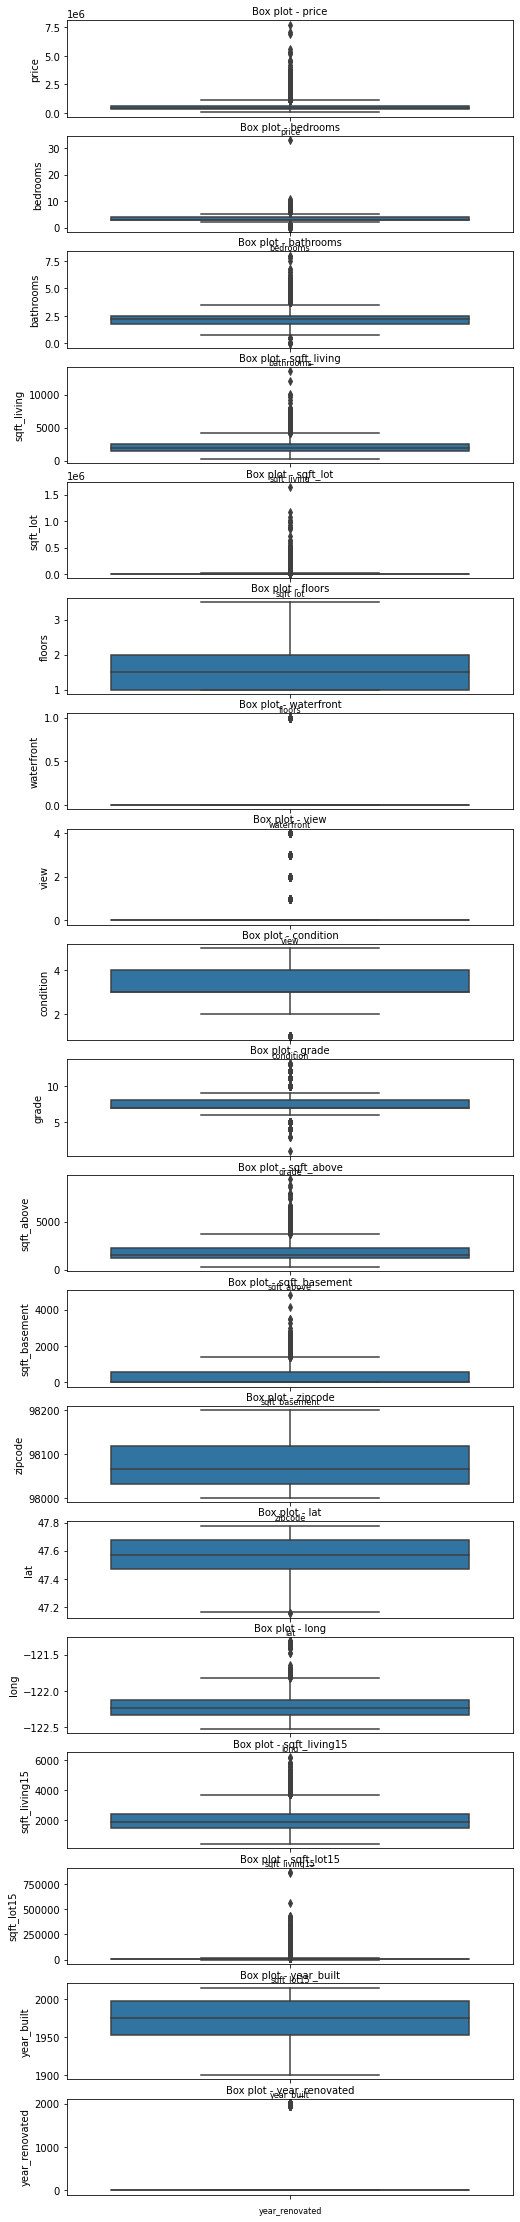

In [36]:
# Plotting columns with numerical values only to check for outliers
col_names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
             'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
             'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
             'sqft_lot15', 'year_built', 'year_renovated']

fig, ax = plt.subplots(len(col_names), figsize= (8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

# The outliers could be due to the high scores by the teams so we will keep them
# considering they are on home score column and away score
# but to check more on the outliers we will find the minimum and maximum values to see 
# if there's more information on the same

In [37]:
# checking the anomalies
Quantile_1 = df.quantile(.25)
Quantile_3 = df.quantile(.75)
IQR_values = Quantile_3 - Quantile_1

anomalies = ((df < Quantile_1 - 1.5* IQR_values) | (df > Quantile_3 + 1.5 * IQR_values)).sum()
anomalies

id                   0
price             1146
bedrooms           522
bathrooms          565
sqft_living        566
sqft_lot          2397
floors               0
waterfront         163
view              2108
condition           28
grade             1880
sqft_above         600
sqft_basement      490
zipcode              0
lat                  2
long               248
sqft_living15      499
sqft_lot15        2167
year_built           0
year_renovated     906
dtype: int64

Initially we had seen that the year renovated column had 914 entries with years indicated while almost 20,000 entries didn't have any year of renovation indicated. Having 906 entries on year renovated as an anomaly is because majority of the data in that column had zero as year of renovation. We will therefore not drop these anomalies as they are not anomalies per se.

In [38]:
# Checking the data distribution type by performing a normality test using the Shapiro Test
# importing the shapiro function
from scipy.stats import shapiro

data = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
             'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
             'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
             'sqft_lot15', 'year_built', 'year_renovated']]

# Test for normality
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpreting the results
alpha = 0.05
if p > alpha: 
  print('Sample looks Guassian.')
else:
  print('Sample does not look Guassian.')


Statistics=0.252, p=0.000
Sample does not look Guassian.


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


## 6. Exploratory Analysis

In [39]:
# Change the bathroom and floors datatype from float to integer 
# Because the number of bathrooms and floors need to be whole numbers
# But first, round off the float values
# Then convert float to integer
df['bathrooms'] = df['bathrooms'].round(0)
df['floors'] = df['floors'].round(0)

In [40]:
# Convert float values of bathrooms and floors to integer
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)

In [41]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated'],
      dtype='object')

In [42]:
df['view'].unique()

array([0, 3, 4, 2, 1])

In [43]:
df['waterfront'].unique()

array([0, 1])

In [44]:
df['bathrooms'].unique()

array([1, 2, 3, 4, 5, 0, 6, 7, 8])

In [45]:
df['floors'].unique()

array([1, 2, 3, 4])

In [46]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [47]:
# Previewing the outliers from the home score column
gkk = df.groupby(['bedrooms'])
gkk.last()
# From previewing the scores, it's confirmed that the teams scored those number of goals.
# Therefore, we will keep the outliers because they are valid

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated
bedrooms,,,,,,,,,,,,,,,,,,,
0,3980300371,142000.0,0,290,20875,1,0,0,1,1,290,0,98024,47.5308,-121.888,1620,22850,1963,0.0
1,688000017,516500.0,1,1100,638,3,0,0,3,9,1100,0,98112,47.6228,-122.307,1110,1933,2014,0.0
2,1523300157,325000.0,1,1020,1076,2,0,0,3,7,1020,0,98144,47.5941,-122.299,1020,1357,2008,0.0
3,291310100,400000.0,2,1600,2388,2,0,0,3,8,1600,0,98027,47.5345,-122.069,1410,1287,2004,0.0
4,6600060120,400000.0,2,2310,5813,2,0,0,3,8,2310,0,98146,47.5107,-122.362,1830,7200,2014,0.0
5,249000205,1540000.0,4,4470,8088,2,0,0,3,11,4470,0,98004,47.6321,-122.200,2780,8964,2008,0.0
6,603000555,462500.0,3,2390,4000,2,0,0,3,7,2390,0,98118,47.5173,-122.286,1680,5000,2014,0.0
7,2771604190,824000.0,4,3670,4000,2,0,1,3,8,2800,870,98199,47.6375,-122.388,2010,4000,1964,0.0
8,3756900027,575000.0,3,3840,15990,1,0,0,3,7,2530,1310,98034,47.7111,-122.211,1380,8172,1961,0.0


### 6.1 Univariate Analysis

In [48]:
# Ploting the univariate summaries
df_1 = df.copy(deep=True)
col = ['id', 'waterfront', 'zipcode', 'lat', 'long', 'sqft_living15',
       'year_built', 'year_renovated']

df_drop = df_1.drop(columns=col, inplace=True)
df_1.columns
df_1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_lot15
count,2.126000e+04,21260.000000,21260.000000,21260.000000,2.126000e+04,21260.000000,21260.000000,21260.000000,21260.000000,21260.000000,21260.000000,21260.000000
mean,5.421834e+05,3.372295,2.063029,2085.509548,1.516437e+04,1.538382,0.235936,3.411289,7.666557,1793.539417,291.970132,12803.450141
std,3.681205e+05,0.928313,0.755915,919.858683,4.165740e+04,0.555058,0.767861,0.649774,1.173127,829.963254,442.986250,27447.132427
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,290.000000,0.000000,651.000000
25%,3.249500e+05,3.000000,2.000000,1430.000000,5.039500e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,5100.000000
50%,4.510000e+05,3.000000,2.000000,1920.000000,7.606000e+03,2.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,7620.000000
75%,6.468500e+05,4.000000,2.000000,2551.250000,1.070025e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,10090.250000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,4.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,871200.000000


In [49]:
# Sort Values By Views
most_viewed= df.sort_values(by = 'view', ascending = False)
most_viewed.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated
4013,724069059,2400000.0,3,2,3000,11665,2,1,4,3,11,3000,0,98075,47.5884,-122.086,3000,15959,2001,0.0
16911,3754501060,910000.0,2,2,2000,5150,2,0,4,3,9,2000,0,98034,47.7056,-122.223,2510,6800,1992,0.0
15255,2425049063,3640000.0,4,3,4830,22257,2,1,4,4,11,4830,0,98039,47.6409,-122.241,3820,25582,1990,0.0
15258,1732800780,3070000.0,5,3,4150,7500,2,0,4,5,11,3510,640,98119,47.6303,-122.362,2250,4050,1909,0.0
13798,3585900150,1000000.0,2,2,2430,23400,1,0,4,3,10,2430,0,98177,47.7616,-122.372,3150,23600,1951,0.0


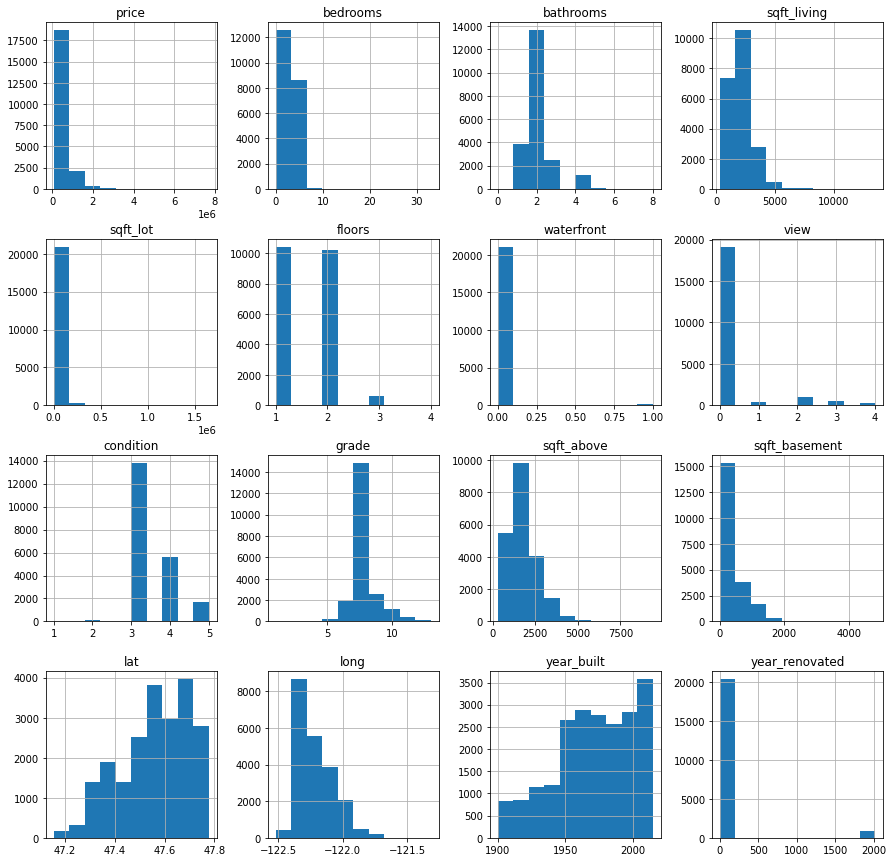

In [50]:
# Plot histogram to show the value count per parameters
most_viewed.drop(columns=['id', 'zipcode', 'sqft_living15', 'sqft_lot15'], inplace=True)

most_viewed.hist(figsize = (15, 15));


In [51]:
# Check the Skewness
for i, col_val in enumerate(df_1.columns):
  print(f"The skewness of {col_val} is: {df_1[col_val].skew()}")

The skewness of price is: 4.038002230797499
The skewness of bedrooms is: 2.0058540875024358
The skewness of bathrooms is: 1.0877934776910192
The skewness of sqft_living is: 1.4704943554419936
The skewness of sqft_lot is: 13.027305662164554
The skewness of floors is: 0.3839302169400582
The skewness of view is: 3.3777124680651305
The skewness of condition is: 1.0391744291949012
The skewness of grade is: 0.7691912498566341
The skewness of sqft_above is: 1.4417979103300504
The skewness of sqft_basement is: 1.5758316234430516
The skewness of sqft_lot15 is: 9.484021339870228


In [52]:
# Check the Kurtosis
for i, col_val in enumerate(df_1.columns):
  print(f"The kurtosis of {col_val} is: {df_1[col_val].kurt()}")

The kurtosis of price is: 34.69325153679448
The kurtosis of bedrooms is: 50.22827330565464
The kurtosis of bathrooms is: 2.7621810014318933
The kurtosis of sqft_living is: 5.255040495639525
The kurtosis of sqft_lot is: 283.08961071078306
The kurtosis of floors is: -0.812598461691326
The kurtosis of view is: 10.768092426141335
The kurtosis of condition is: 0.5091215258263175
The kurtosis of grade is: 1.1894884991074162
The kurtosis of sqft_above is: 3.387927205152389
The kurtosis of sqft_basement is: 2.708583067557582
The kurtosis of sqft_lot15 is: 149.88524243207544


### 6.2 Bivariate Analysis

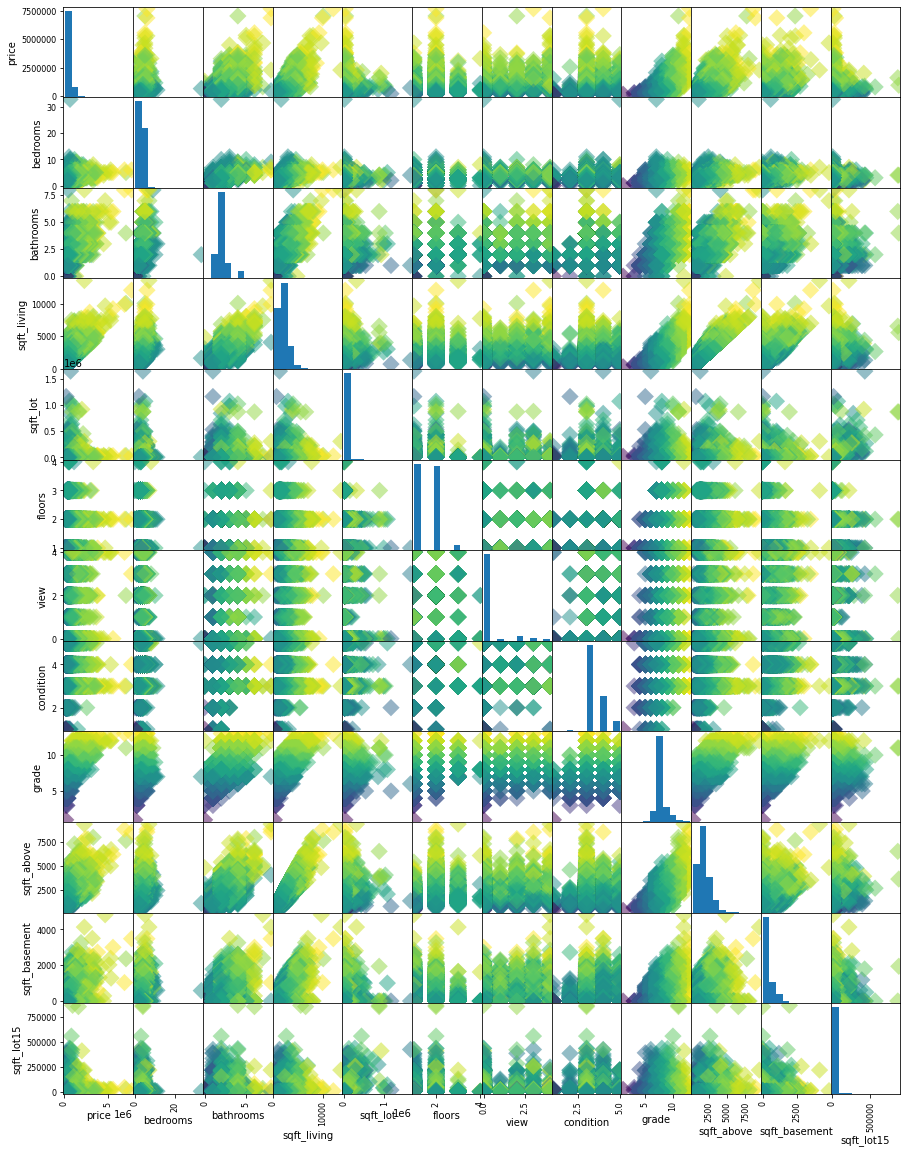

In [53]:
# plot scatter matrix to display Bivariate Relationships between combination variables
y = df_1['grade']
_ = pd.plotting.scatter_matrix(df_1, c = y, figsize=[15,20], s=150, marker='D')

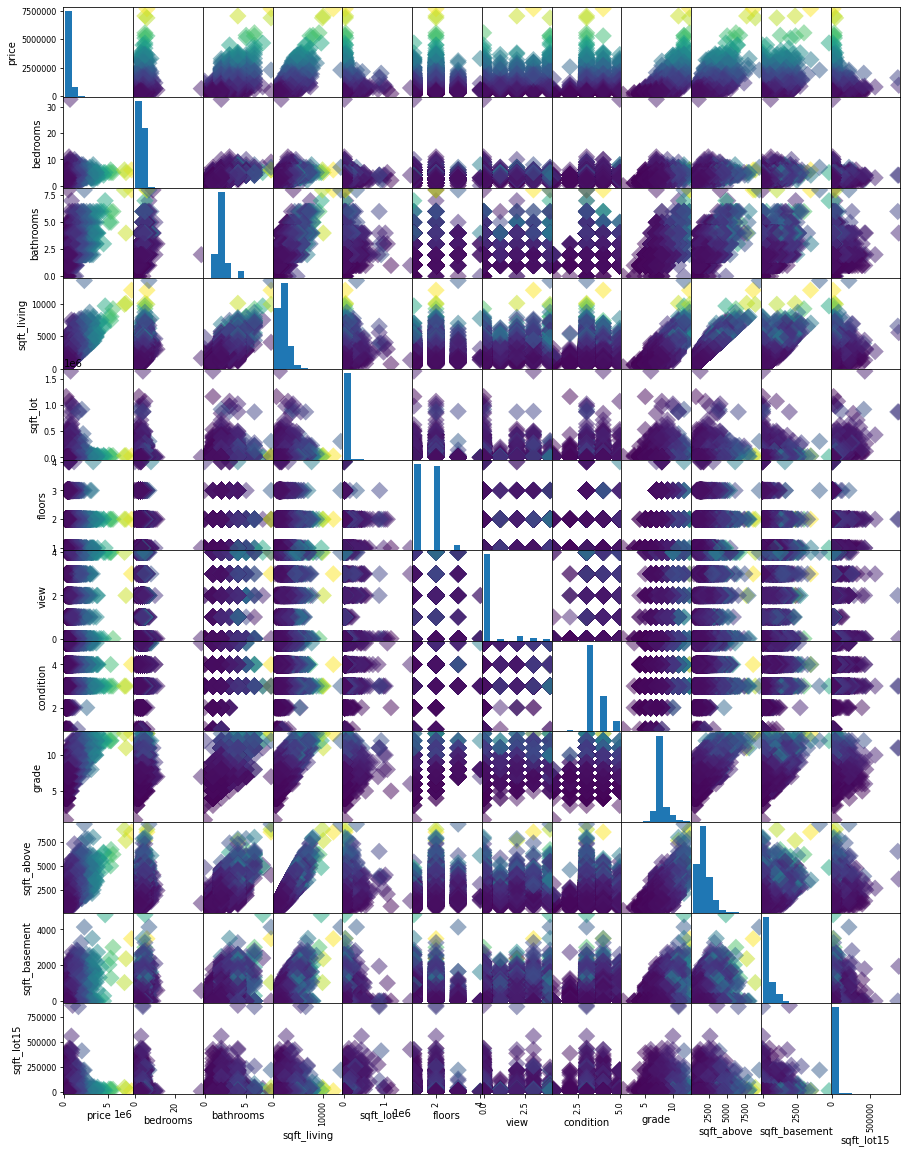

In [54]:
y = df_1['price']
_ = pd.plotting.scatter_matrix(df_1, c = y, figsize=[15,20], s=150, marker='D')

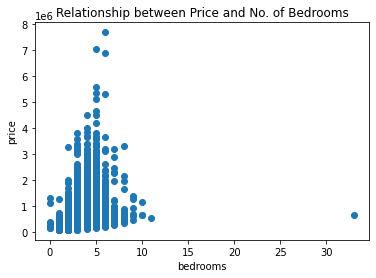

In [55]:
# Scatter plot for price vs number of bedrooms
x = df_1['bedrooms']
y = df_1["price"]
plt.scatter(x, y)
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.title('Relationship between Price and No. of Bedrooms');

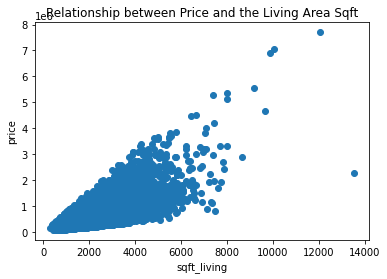

In [56]:
# Scatter plot of price and the living area square feet.
x = df_1['sqft_living']
y = df_1["price"]
plt.scatter(x, y)
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.title('Relationship between Price and the Living Area Sqft');

There's a positive relationship between the price and the living area sqft. As the sqft increases, the price also increases.

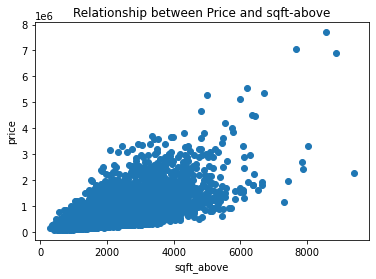

In [57]:
# Scatter plot of sqft-above and price
x = df_1['sqft_above']
y = df_1["price"]
plt.scatter(x, y)
plt.xlabel('sqft_above')
plt.ylabel("price")
plt.title("Relationship between Price and sqft-above");

There's a relationship between price and sqft above

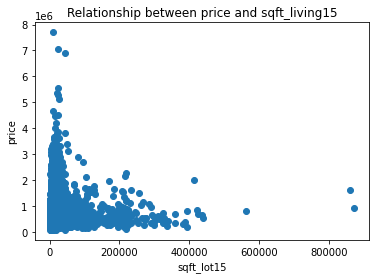

In [58]:
x = df_1['sqft_lot15']
y = df_1["price"]
plt.scatter(x, y)
plt.xlabel('sqft_lot15')
plt.ylabel("price")
plt.title("Relationship between price and sqft_living15");

In [59]:
# Convert the date index to time series
# For time series, set the date column to be the index column
# Save the changes in a new dataframe
time_series_df = data.copy(deep=True)
time_series_df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,1955,0.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,1951,1991.0


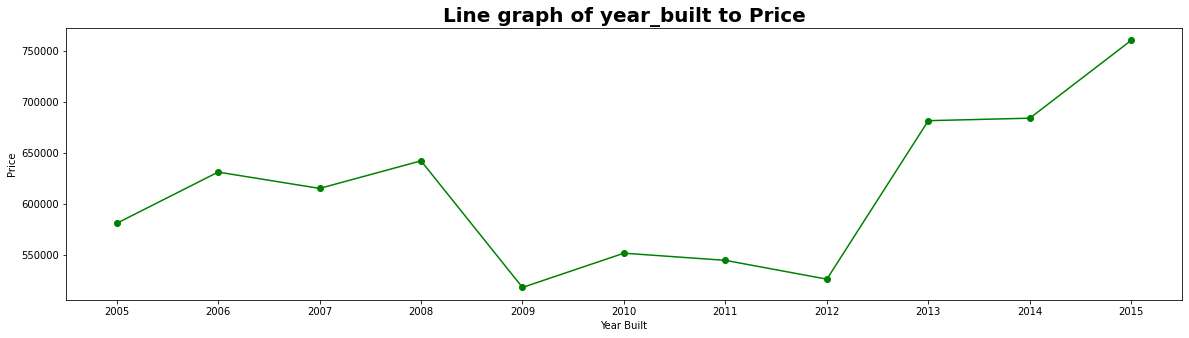

In [60]:
# Line graph of how the price has fluctuated over time from the year the houses were
# built for the past 10 years (2005 to 2015)
yr_built = time_series_df[time_series_df["year_built"] >= 2005]
scatter =yr_built.groupby("year_built")['price'].mean().reset_index(name = 'avg_per_year')

x = scatter['year_built']
y= scatter['avg_per_year']
plt.figure(figsize=(20,5))
plt.plot(x,y,color = 'green',marker = 'o',linestyle = '-')
plt.xlabel('Year Built')
plt.xticks(x)
plt.ylabel('Price')
plt.title('Line graph of year_built to Price', fontsize = 20,fontweight='bold');

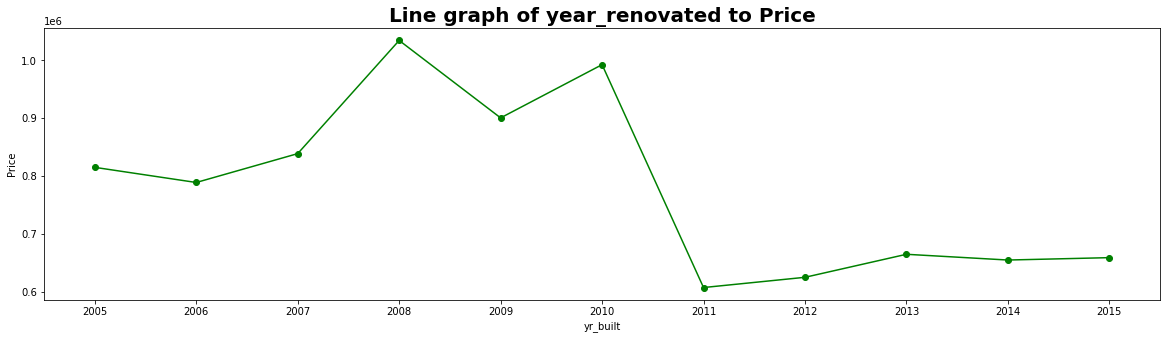

In [61]:
# Line graph of how the price has fluctuated over time from the year the houses were
# renovated for the past 10 years (2005 to 2015)
yr_renovated = data[data["year_renovated"] >= 2005]
scatter =yr_renovated.groupby("year_renovated")['price'].mean().reset_index(name = 'avg_year_renovated')

x = scatter['year_renovated']
y= scatter['avg_year_renovated']
plt.figure(figsize=(20,5))
plt.plot(x,y,color = 'green',marker = 'o',linestyle = '-')
plt.xlabel('yr_built')
plt.xticks(x)
plt.ylabel('Price')
plt.title('Line graph of year_renovated to Price', fontsize = 20,fontweight='bold');

In [62]:
# make a copy of the dataset and create a new column for renovations
renov_df = data.copy(deep=True)

In [63]:
#Since the year renovated had most 0 values, we will change the the zeros to reflect
# not renovated and 1 to reflect those houses that were renovated.
renov_df.loc[df['year_renovated']==0,'renovations']=0
renov_df.loc[df['year_renovated']>0,'renovations']=1
renov_df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,1955,0.0,0.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,1951,1991.0,1.0


In [64]:
# Convert float values of renovations to integer
renov_df['renovations'] = renov_df['renovations'].astype(int)
renov_df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,1955,0.0,0


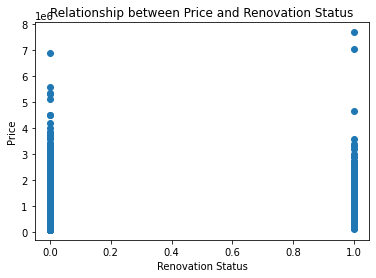

In [65]:
# Relationship between price and renovated houses or not
x = renov_df['renovations']
y = renov_df["price"]
plt.scatter(x, y)
plt.xlabel('Renovation Status')
plt.ylabel("Price")
plt.title("Relationship between Price and Renovation Status");

In [66]:
# Create a new column for current date (27th July 2021)
renov_df['date'] = pd.to_datetime('today')
renov_df.head(1)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,date
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,1955,0.0,0,2021-07-27 16:00:16.254541


In [67]:
# Extract the year from current date
renov_df['current_year'] = renov_df['date'].dt.year
renov_df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,date,current_year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,1955,0.0,0,2021-07-27 16:00:16.254541,2021
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,1951,1991.0,1,2021-07-27 16:00:16.254541,2021


In [68]:
# Establish the age of the house by subtracting the year built from current year
renov_df['house_age'] = renov_df['current_year'] - renov_df['year_built']
renov_df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,date,current_year,house_age
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,1955,0.0,0,2021-07-27 16:00:16.254541,2021,66


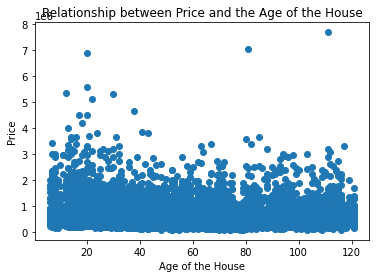

In [69]:
# relationship between price and age of the house
x = renov_df['house_age']
y = renov_df["price"]
plt.scatter(x, y)
plt.xlabel('Age of the House')
plt.ylabel("Price")
plt.title("Relationship between Price and the Age of the House");

#### Performing Discriminant Analysis

In [70]:
# Preview the columns
renov_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated', 'renovations', 'date',
       'current_year', 'house_age'],
      dtype='object')

In [71]:
# Drop the date and current year column
renov_lda_df = renov_df.copy(deep=True)
renov_lda_df.head(1)
renov_lda_df.drop(columns=['date', 'current_year'], inplace=True)
renov_lda_df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,house_age
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,1955,0.0,0,66


In [72]:
# Create features and labels
X = renov_lda_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                  'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                  'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
                  'sqft_lot15', 'year_built', 'year_renovated', 'renovations',
                  'house_age']].values
y = renov_lda_df['price'].values

In [73]:
# Divide data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

#display the intercept / bias
print(regressor.intercept_)

#display the coefficient
print(regressor.coef_)

2285189.669557794
[-3.51464848e+04  4.16494349e+04  1.08085332e+02  1.27877768e-01
  6.18905559e+03  5.97216343e+05  5.15601956e+04  2.86218656e+04
  9.74690260e+04  6.87151045e+01  3.93702230e+01 -5.70757930e+02
  6.16690117e+05 -2.14149767e+05  2.57494841e+01 -4.03918720e-01
 -1.30969614e+03  3.60308466e+03 -7.15557104e+06  1.30969614e+03]


In [75]:
y_predict = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

comparison_frame

,Actual,Predicted
0,324950.0,3.440422e+05
1,461000.0,4.137849e+05
2,2210000.0,1.063336e+06
3,287000.0,3.181334e+05
4,635000.0,5.699255e+05
...,...,...
4247,255000.0,2.281296e+05
4248,395000.0,6.342020e+05
4249,815000.0,9.039389e+05
4250,209950.0,1.752538e+05


In [76]:
y_predict = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,4.252000e+03,4.252000e+03
mean,5.422838e+05,5.433319e+05
std,3.630870e+05,3.037791e+05
min,7.500000e+04,-4.253466e+05
25%,3.275000e+05,3.383455e+05
50%,4.550000e+05,4.907771e+05
75%,6.500000e+05,6.906760e+05
max,7.700000e+06,3.312386e+06


In [77]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 124313.39739163197
Mean Squared Error: 41555072179.20428
Root Mean Squared Error: 203850.61240821495


In [78]:
# Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [79]:
# Perform LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [80]:
# Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [81]:
# Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy0.012699905926622766


In [82]:
## Hyperparameter Tuning using randon search
df_2 = renov_lda_df.copy(deep=True)
df_2.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,1955,0.0,0,66
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,1951,1991.0,1,70


## 7. Implementing the Solution-Multiple Linear Regression

### 7.1 Polynomial Regression

> We'll first check the multicollinearity between the variables and drop those variables that seem to be correlated.





#### 7.1.1 Multicollinearity

#### Finding correlation between the independent variables

In [83]:
df_2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated', 'renovations',
       'house_age'],
      dtype='object')

In [84]:
# Set price as the dependent variable
# Compute the correlation then use the correlation to compute the VIF score for each variable
# We'll drop the price column
prediction_df = df_2.drop(columns=['price'], inplace=True)
prediction_df = df_2.corr()
prediction_df 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,house_age
bedrooms,1.000000,0.517678,0.578373,0.031738,0.174991,-0.006787,0.079556,0.027345,0.359853,0.479303,0.302984,-0.154612,-0.011542,0.130218,0.394718,0.028991,0.153312,0.018026,0.017736,-0.153312
bathrooms,0.517678,1.000000,0.754187,0.086547,0.499077,0.063725,0.185623,-0.130592,0.664500,0.684649,0.283332,-0.202117,0.022317,0.220845,0.567780,0.086081,0.504157,0.051475,0.051010,-0.504157
sqft_living,0.578373,0.754187,1.000000,0.171084,0.351785,0.103985,0.282888,-0.063120,0.762094,0.876773,0.433805,-0.197860,0.049702,0.238217,0.755999,0.182266,0.315029,0.054808,0.054542,-0.315029
sqft_lot,0.031738,0.086547,0.171084,1.000000,-0.006701,0.021539,0.075318,-0.009620,0.111454,0.181645,0.014933,-0.129254,-0.086301,0.229594,0.142689,0.717635,0.051810,0.007630,0.007735,-0.051810
floors,0.174991,0.499077,0.351785,-0.006701,1.000000,0.023245,0.026967,-0.269250,0.456775,0.521404,-0.246403,-0.057138,0.048951,0.123157,0.277837,-0.012566,0.488804,0.004909,0.004834,-0.488804
waterfront,-0.006787,0.063725,0.103985,0.021539,0.023245,1.000000,0.404204,0.016565,0.082905,0.071966,0.081092,0.030827,-0.014516,-0.042466,0.086654,0.030686,-0.026918,0.093166,0.093585,0.026918
view,0.079556,0.185623,0.282888,0.075318,0.026967,0.404204,1.000000,0.044120,0.248435,0.166206,0.276016,0.089375,0.005183,-0.081047,0.277701,0.073164,-0.056885,0.103347,0.103491,0.056885
condition,0.027345,-0.130592,-0.063120,-0.009620,-0.269250,0.016565,0.044120,1.000000,-0.151642,-0.163294,0.174872,0.005853,-0.015831,-0.108989,-0.097074,-0.004037,-0.368435,-0.061636,-0.061152,0.368435
grade,0.359853,0.664500,0.762094,0.111454,0.456775,0.082905,0.248435,-0.151642,1.000000,0.756200,0.165696,-0.180582,0.112591,0.194794,0.711823,0.117375,0.443669,0.014312,0.013915,-0.443669
sqft_above,0.479303,0.684649,0.876773,0.181645,0.521404,0.071966,0.166206,-0.163294,0.756200,1.000000,-0.052951,-0.259680,-0.002488,0.342435,0.732121,0.192775,0.421769,0.022043,0.021938,-0.421769


The tabe above shows how each variable relates to another. The coefficient of 1 across the diagonal makes sense, as a variable is perfectly correlated to itself. Using these correlations to compute the VIF score for each variable. But first we'll create a new dataframe with the inverse of the matrix above.

#### 7.1.2 Calculating the VIF Score for each independent variable

In [85]:
# Create a new dataframe with the inverse of the matrix above correlations
pd.DataFrame(np.linalg.inv(prediction_df.values), index = prediction_df.index, columns=prediction_df.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,year_renovated,renovations,house_age
bedrooms,1.657368,-0.464834,1.281008e+00,0.047075,0.048743,0.063286,0.113280,-0.053363,0.301226,-2.048719e+00,-1.215194e+00,0.082792,0.052781,0.016446,0.019957,0.087795,-3.068325e+02,-2.364603,2.412172,-3.136478e+02
bathrooms,-0.464834,3.355951,3.814393e+00,-0.027358,-0.675273,0.006657,-0.042761,-0.142207,-0.267001,-4.755348e+00,-2.553591e+00,0.042086,-0.041920,0.054821,0.088227,0.073054,9.462774e+02,-8.539200,8.272567,9.608810e+02
sqft_living,0.723747,11.828126,9.160753e+13,-2.259433,-4.906194,-5.197550,-4.320744,-7.960713,13.565084,-8.483237e+13,-3.887347e+13,0.252161,-1.285642,1.169691,-5.361056,0.547335,-2.824059e+14,-16565.290443,16595.507317,1.722553e+13
sqft_lot,0.047075,-0.027358,-1.169623e+00,2.097219,0.046048,0.028570,-0.060343,0.032487,-0.055740,8.526621e-01,5.328737e-01,-0.002953,0.054139,-0.135303,0.164966,-1.453611,-1.182120e+02,2.323832,-2.302225,-1.173231e+02
floors,0.048743,-0.675273,-5.391655e+00,0.046048,2.006067,-0.004491,-0.037251,0.094253,-0.229680,4.322368e+00,3.163555e+00,-0.169796,-0.126055,0.165085,0.272559,0.071592,2.014426e+02,4.294584,-4.373366,2.016633e+02
waterfront,0.063286,0.006657,-2.570876e+00,0.028570,-0.004491,1.209227,-0.495760,-0.010660,0.043512,2.223461e+00,1.333127e+00,0.024009,0.010120,0.027188,0.056205,-0.018266,-2.460992e+02,6.465497,-6.531911,-2.415187e+02
view,0.113280,-0.042761,-3.006458e+00,-0.060343,-0.037251,-0.495760,1.436839,-0.017634,-0.183336,2.706453e+00,9.870431e-01,-0.145734,0.118923,0.070655,-0.322066,-0.008566,-1.341148e+02,1.657097,-1.694728,-1.434485e+02
condition,-0.053363,-0.142207,1.637356e+00,0.032487,0.094253,-0.010660,-0.017634,1.262874,-0.053901,-1.555370e+00,-1.047391e+00,0.158805,0.066707,-0.007472,0.078866,-0.029090,-1.316702e+03,8.609674,-8.397792,-1.314667e+03
grade,0.301226,-0.267001,9.029449e+00,-0.055740,-0.229680,0.043512,-0.183336,-0.053901,3.410936,-9.612928e+00,-4.690931e+00,0.077899,-0.329459,0.395080,-0.910825,0.073554,4.324396e+02,-11.466565,11.395598,4.301424e+02
sqft_above,-1.523529,-11.944891,-8.265496e+13,1.845471,3.928388,4.581566,3.934827,7.241319,-13.851704,7.654192e+13,3.507446e+13,-0.302760,1.340701,-1.399243,3.307827,-0.673460,2.548071e+14,14953.207186,-14980.467614,-1.554212e+13


The VIF score for each variable is below 5. A rule of thumb is if a VIF is > 10, there's high multicollinearity among the variables. In this case, with values around 1, we are in good shape, and can proceed with the regression. The VIF for sqft_living is 7.691731e+13, that of sqft_above is 6.261806e+13 and sqft_basement is 1.783867e+13. We will drop these variables because they are correlated.

Next we will create a model based on the set of independent variables above, then displaying the residual plot for it.

In [86]:
# Check the columns
df_2.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'year_renovated', 'renovations',
       'house_age'],
      dtype='object')

In [87]:
# Compute Correlation after dropping the correlated independent variables
prediction_df2 = df_2.drop(columns=['sqft_living', 'sqft_above', 'sqft_basement', 'year_renovated'], inplace=True)
prediction_df2 = df_2.corr()
prediction_df2 

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,renovations,house_age
bedrooms,1.000000,0.517678,0.031738,0.174991,-0.006787,0.079556,0.027345,0.359853,-0.154612,-0.011542,0.130218,0.394718,0.028991,0.153312,0.017736,-0.153312
bathrooms,0.517678,1.000000,0.086547,0.499077,0.063725,0.185623,-0.130592,0.664500,-0.202117,0.022317,0.220845,0.567780,0.086081,0.504157,0.051010,-0.504157
sqft_lot,0.031738,0.086547,1.000000,-0.006701,0.021539,0.075318,-0.009620,0.111454,-0.129254,-0.086301,0.229594,0.142689,0.717635,0.051810,0.007735,-0.051810
floors,0.174991,0.499077,-0.006701,1.000000,0.023245,0.026967,-0.269250,0.456775,-0.057138,0.048951,0.123157,0.277837,-0.012566,0.488804,0.004834,-0.488804
waterfront,-0.006787,0.063725,0.021539,0.023245,1.000000,0.404204,0.016565,0.082905,0.030827,-0.014516,-0.042466,0.086654,0.030686,-0.026918,0.093585,0.026918
view,0.079556,0.185623,0.075318,0.026967,0.404204,1.000000,0.044120,0.248435,0.089375,0.005183,-0.081047,0.277701,0.073164,-0.056885,0.103491,0.056885
condition,0.027345,-0.130592,-0.009620,-0.269250,0.016565,0.044120,1.000000,-0.151642,0.005853,-0.015831,-0.108989,-0.097074,-0.004037,-0.368435,-0.061152,0.368435
grade,0.359853,0.664500,0.111454,0.456775,0.082905,0.248435,-0.151642,1.000000,-0.180582,0.112591,0.194794,0.711823,0.117375,0.443669,0.013915,-0.443669
zipcode,-0.154612,-0.202117,-0.129254,-0.057138,0.030827,0.089375,0.005853,-0.180582,1.000000,0.266944,-0.565131,-0.277344,-0.146766,-0.344775,0.064287,0.344775
lat,-0.011542,0.022317,-0.086301,0.048951,-0.014516,0.005183,-0.015831,0.112591,0.266944,1.000000,-0.137223,0.046479,-0.086588,-0.149088,0.028968,0.149088


In [88]:
# Calculate the VIF scores
# Create a new dataframe with the inverse of the matrix above correlations
pd.DataFrame(np.linalg.inv(prediction_df2.values), index = prediction_df2.index, columns=prediction_df2.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,renovations,house_age
bedrooms,1.466467,-0.800588,0.014924,0.072511,0.048558,0.080167,-0.059285,0.008925,0.060596,0.065685,-0.008139,-0.258002,0.053934,-2.132840e+00,0.046236,-2.292457e+00
bathrooms,-0.800588,2.694408,-0.070715,-0.467970,-0.006792,-0.151427,-0.174081,-0.706861,-0.004269,-0.052079,0.074343,-0.327549,0.020227,4.598700e+00,-0.271325,5.298208e+00
sqft_lot,0.014924,-0.070715,2.089125,0.020061,0.023070,-0.057177,0.034273,-0.117262,-0.005229,0.062039,-0.150549,0.103923,-1.460446,-2.341488e-01,0.021665,-3.417292e-01
floors,0.072511,-0.467970,0.020061,1.615010,-0.029381,0.086407,0.148907,-0.371139,-0.150316,-0.049882,0.020100,0.138955,0.059748,1.669309e-01,-0.072642,7.951879e-01
waterfront,0.048558,-0.006792,0.023070,-0.029381,1.203730,-0.491388,-0.011058,0.012542,0.023896,0.015723,0.015981,0.019926,-0.021697,-1.277323e-01,-0.066581,-9.824793e-02
view,0.080167,-0.151427,-0.057177,0.086407,-0.491388,1.393602,-0.037159,-0.177278,-0.154501,0.096818,0.112447,-0.320155,-0.009344,1.842452e-01,-0.039949,4.013634e-02
condition,-0.059285,-0.174081,0.034273,0.148907,-0.011058,-0.037159,1.249902,-0.032710,0.156444,0.055217,0.013616,0.088897,-0.027493,-6.126650e+00,0.210320,-6.727324e+00
grade,0.008925,-0.706861,-0.117262,-0.371139,0.012542,-0.177278,-0.032710,2.876056,0.050892,-0.272921,0.288249,-1.408573,0.013911,-4.291666e-01,-0.069547,3.507156e-02
zipcode,0.060596,-0.004269,-0.005229,-0.150316,0.023896,-0.154501,0.156444,0.050892,1.659905,-0.307284,0.740412,0.186054,-0.018185,1.748903e+00,0.037277,1.470400e+00
lat,0.065685,-0.052079,0.062039,-0.049882,0.015723,0.096818,0.055217,-0.272921,-0.307284,1.162730,-0.067682,-0.041107,0.041065,-1.577911e+00,0.046078,-1.874955e+00


In [89]:
# The house age has a high correlation so we'll drop it
# Compute Correlation after dropping the correlated independent variables
prediction_df3 = df_2.drop(columns=['house_age'], inplace=True)
prediction_df3 = df_2.corr()
prediction_df3 

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,renovations
bedrooms,1.000000,0.517678,0.031738,0.174991,-0.006787,0.079556,0.027345,0.359853,-0.154612,-0.011542,0.130218,0.394718,0.028991,0.153312,0.017736
bathrooms,0.517678,1.000000,0.086547,0.499077,0.063725,0.185623,-0.130592,0.664500,-0.202117,0.022317,0.220845,0.567780,0.086081,0.504157,0.051010
sqft_lot,0.031738,0.086547,1.000000,-0.006701,0.021539,0.075318,-0.009620,0.111454,-0.129254,-0.086301,0.229594,0.142689,0.717635,0.051810,0.007735
floors,0.174991,0.499077,-0.006701,1.000000,0.023245,0.026967,-0.269250,0.456775,-0.057138,0.048951,0.123157,0.277837,-0.012566,0.488804,0.004834
waterfront,-0.006787,0.063725,0.021539,0.023245,1.000000,0.404204,0.016565,0.082905,0.030827,-0.014516,-0.042466,0.086654,0.030686,-0.026918,0.093585
view,0.079556,0.185623,0.075318,0.026967,0.404204,1.000000,0.044120,0.248435,0.089375,0.005183,-0.081047,0.277701,0.073164,-0.056885,0.103491
condition,0.027345,-0.130592,-0.009620,-0.269250,0.016565,0.044120,1.000000,-0.151642,0.005853,-0.015831,-0.108989,-0.097074,-0.004037,-0.368435,-0.061152
grade,0.359853,0.664500,0.111454,0.456775,0.082905,0.248435,-0.151642,1.000000,-0.180582,0.112591,0.194794,0.711823,0.117375,0.443669,0.013915
zipcode,-0.154612,-0.202117,-0.129254,-0.057138,0.030827,0.089375,0.005853,-0.180582,1.000000,0.266944,-0.565131,-0.277344,-0.146766,-0.344775,0.064287
lat,-0.011542,0.022317,-0.086301,0.048951,-0.014516,0.005183,-0.015831,0.112591,0.266944,1.000000,-0.137223,0.046479,-0.086588,-0.149088,0.028968


In [90]:
# Calculate the VIF scores
# Create a new dataframe with the inverse of the matrix above correlations
pd.DataFrame(np.linalg.inv(prediction_df3.values), index = prediction_df3.index, columns=prediction_df3.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,renovations
bedrooms,1.466467,-0.800588,0.014924,0.072511,0.048558,0.080167,-0.059285,0.008925,0.060596,0.065685,-0.008139,-0.258002,0.053934,0.246686,0.046236
bathrooms,-0.800588,2.694408,-0.070715,-0.467970,-0.006792,-0.151427,-0.174081,-0.706861,-0.004269,-0.052079,0.074343,-0.327549,0.020227,-0.759317,-0.271325
sqft_lot,0.014924,-0.070715,2.089125,0.020061,0.023070,-0.057177,0.034273,-0.117262,-0.005229,0.062039,-0.150549,0.103923,-1.460446,0.119250,0.021665
floors,0.072511,-0.467970,0.020061,1.615010,-0.029381,0.086407,0.148907,-0.371139,-0.150316,-0.049882,0.020100,0.138955,0.059748,-0.474966,-0.072642
waterfront,0.048558,-0.006792,0.023070,-0.029381,1.203730,-0.491388,-0.011058,0.012542,0.023896,0.015723,0.015981,0.019926,-0.021697,-0.012003,-0.066581
view,0.080167,-0.151427,-0.057177,0.086407,-0.491388,1.393602,-0.037159,-0.177278,-0.154501,0.096818,0.112447,-0.320155,-0.009344,0.166076,-0.039949
condition,-0.059285,-0.174081,0.034273,0.148907,-0.011058,-0.037159,1.249902,-0.032710,0.156444,0.055217,0.013616,0.088897,-0.027493,0.572440,0.210320
grade,0.008925,-0.706861,-0.117262,-0.371139,0.012542,-0.177278,-0.032710,2.876056,0.050892,-0.272921,0.288249,-1.408573,0.013911,-0.457908,-0.069547
zipcode,0.060596,-0.004269,-0.005229,-0.150316,0.023896,-0.154501,0.156444,0.050892,1.659905,-0.307284,0.740412,0.186054,-0.018185,0.267782,0.037277
lat,0.065685,-0.052079,0.062039,-0.049882,0.015723,0.096818,0.055217,-0.272921,-0.307284,1.162730,-0.067682,-0.041107,0.041065,0.300581,0.046078


After dropping the correlated variables, the VIF score of each independent variable is now at one. The year bult is the only variable with the VIF of 2. This shows that there's no multicorrelinearity between independent variables. We can now proceed with regression; model creation and displaying a residual plot for it.

#### 7.1.3 Building model

In [235]:
## Preview the columns
df_2.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'year_built', 'renovations', 'house_age'],
      dtype='object')

In [236]:
# Import the polynomial features and the linear regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

X = df_2.values
y = most_viewed['price'].values

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

# Fit polynomial Regression to the dataset with a degree of 2
polynomial_regression = PolynomialFeatures(degree = 2) 
X_polynomial = polynomial_regression.fit_transform(X)

pol_regression = LinearRegression()
pol_regression.fit(X_polynomial, y)

y_pred = pol_regression.predict(polynomial_regression.fit_transform(X_test))

In [237]:
# Fit polynomial Regression to the dataset with a degree of 3
polynomial_regression_3 = PolynomialFeatures(degree = 3) 
X_polynomial_3 = polynomial_regression_3.fit_transform(X)

pol_regression_3 = LinearRegression()
pol_regression_3.fit(X_polynomial_3, y)

y_pred_3 = pol_regression_3.predict(polynomial_regression_3.fit_transform(X_test))

In [238]:
# Fit polynomial Regression to the dataset with a degree of 4
polynomial_regression_4 = PolynomialFeatures(degree = 4) 
X_polynomial_4 = polynomial_regression_4.fit_transform(X)

pol_regression_4 = LinearRegression()
pol_regression_4.fit(X_polynomial_4, y)

y_pred_4 = pol_regression_4.predict(polynomial_regression_4.fit_transform(X_test))

In [ ]:
# Fit polynomial Regression to the dataset with a degree of 5
polynomial_regression_5 = PolynomialFeatures(degree = 5) 
X_polynomial_5 = polynomial_regression_5.fit_transform(X)

pol_regression_5 = LinearRegression()
pol_regression_5.fit(X_polynomial_5, y)

y_pred_5 = pol_regression_5.predict(polynomial_regression_5.fit_transform(X_test))

In [ ]:
# Calculating the Root Mean Squared Error
print(f"The Root Mean Squared Error for the 2nd degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"The Root Mean Squared Error for the 3rd degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_3))}")
print(f"The Root Mean Squared Error for the 4th  degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_4))}")
print(f"The Root Mean Squared Error for the 5th degree of freedom is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_5))}")

#### 7.1.4 Cross Validating the model

In [ ]:
# import the Kfold
from sklearn.model_selection import KFold

# We will use the K-Fold cross validation with a value of k=10
folds = KFold(n_splits=10)
print(f"The number of folds used is: {folds.get_n_splits(X)}")

# Assign RMSE to an empty list 
# then we will append the computed RMSES values of the 10 folds to the empty RMSES list
# and thereafter compute the avarage RMSES
RMSES = [] 

# Training Model 1
count = 1
for train_index, test_index in folds.split(X):
  print(f"\nTraining model {count}")
  
  # Set up the train and test 
  # With 10 folds, results in a model skill estimate with a low bias modest variance.
  X1_train, X1_test = X[train_index], X[test_index]
  y1_train, y1_test = y[train_index], y[test_index]
  
  # Fitting the model 
  regressor = LinearRegression()  
  regressor.fit(X1_train, y1_train)
  
  # Assess the accuraccy of the model
  y1_pred = regressor.predict(X1_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))
  RMSES.append(rmse_value)
  
  print(f"Model {count} Root Mean Squared Error is: {rmse_value}")
  count = count + 1

In [ ]:
# RMSES Average
print(f"The Average Value of the RMSES of the 10 folds is: {np.mean(RMSES)}")

#### 7.1.5 Residual plots and heteroskedasticity testing

In [ ]:
# Residuals
residuals = np.subtract(y_pred_5, y_test)
pd.DataFrame(residuals).describe()

In [ ]:
# Residual plot for the Model 
plt.scatter(y_pred_5, residuals, color='blue')
plt.ylabel('Residual')
plt.xlabel('Fitted values')
plt.title('Residual Plot')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [ ]:
# Residual mean
residuals.mean()

##### Computing the Critical Value 

In [ ]:
# Use bartlett's test. 
# The test establishes as a null hypothesis that the variance is equal for all datapoints
# and the Ha hypothesis that the variance is different for at least one pair of datapoints
import scipy.stats as stats
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred_5, residuals)
print("Test result:", test_result)
print("P-value:", p_value)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred_5)-1
print(f"The degree of freedom is: {degree_of_freedom}")

# Probability
probability = 1 - p_value
print(f"The probability value is: {probability}")

# Critical Value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(f"The critical value is: {critical_value}")

if (test_result > critical_value):
  print("The variances are unequal! Reasses the Model!")
else:
  print("The variances are homogeneous! The model is good for consideration")

Having homogeneous variances is a sufficient confirmation that we can be comfortable with the results for predicting variables for sales prices. 

In [ ]:
#Distribution of error terms
residuals_plot = sns.distplot(residuals,kde=True)
residuals_plot = plt.title('Normality of the residuals');

### 7.2 Logistic regression model

##### Performing feature Engineering

In [ ]:
df_2.columns

In [ ]:
# Previewing the dataset
logistic_df = df_2.copy(deep=True)
logistic_df.head(2)

In [ ]:
# create feature and labels for the data
X=logistic_df[['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
               'condition', 'grade', 'lat', 'long', 'year_built', 'year_renovated']]
y=df['price']

In [ ]:
# Fit the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=25)

In [ ]:
# Import the logistic regression model
from sklearn.linear_model import LogisticRegression

# Fit the model
LogReg = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
LogReg.fit(X_train, y_train)

# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [ ]:
# Evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

## 8. Challenging the solution

### 8.1 Quantile Regression

When to use quantile Regression:
1. To estimate the median, or the 0.25 quantile, or any quantile 
2. Key assumption of linear regression is not satisfied
3. When they are Outliers in the data
4. residuals are not normal 
5. Increase in error variance with increase in outcome variable